In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Review

In [2]:
def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates (predictions) at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

_________

In [3]:
demographics = Table.read_table('district_demographics2016.csv')
demographics.sample(6).show()

State,District,Median Income,Percent voting for Clinton,College%
North Carolina,"Congressional District 11 (115th Congress), North Carolina",43855,34,24
Ohio,"Congressional District 12 (115th Congress), Ohio",67415,41.9,41
Ohio,"Congressional District 12 (115th Congress), Ohio",67415,41.9,41
Louisiana,"Congressional District 3 (115th Congress), Louisiana",44668,29.2,21
New York,"Congressional District 13 (115th Congress), New York",41103,92.3,31
Pennsylvania,"Congressional District 1 (115th Congress), Pennsylvania",45025,49.1,27.4


**Linear Fit**

$\text{estimate of Median Income} = a \cdot \text{College\%} + b$

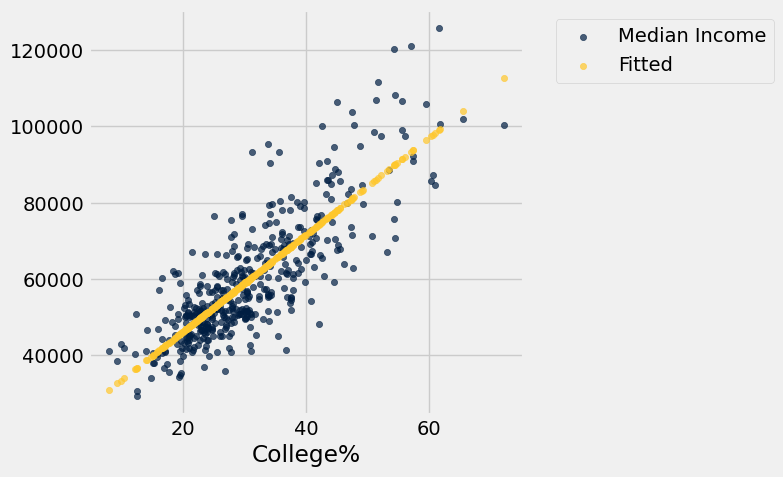

In [6]:
fitted_income = demographics.select('College%', 'Median Income')
fitted_income = fitted_income.with_columns('Fitted',
    fitted_values(demographics, 'College%', 'Median Income'))
fitted_income.scatter('College%')
plots.show()

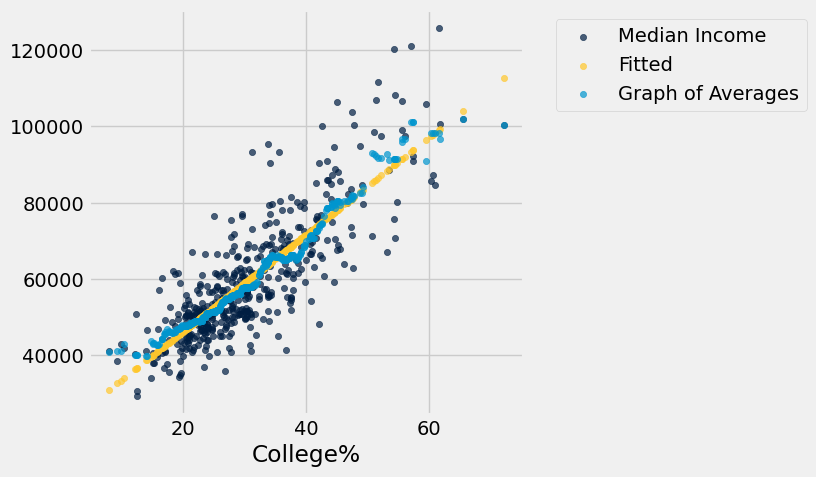

In [7]:
def local_average_income(college):
    """Return a prediction of Median Income from College%
    by averaging over districts with similar College% values.
    """
    a_little = 2
    close_points = demographics.where('College%', are.between(college - a_little, 
                                                              college + a_little))
    return close_points.column('Median Income').mean()   

with_averages = fitted_income.with_columns('Graph of Averages',
    demographics.apply(local_average_income, 'College%'))

with_averages.scatter('College%')
plots.show()

## New material

In [8]:
def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

### Residual plots can tell us about our model fit

#### Case study 1: 2016 election demographics

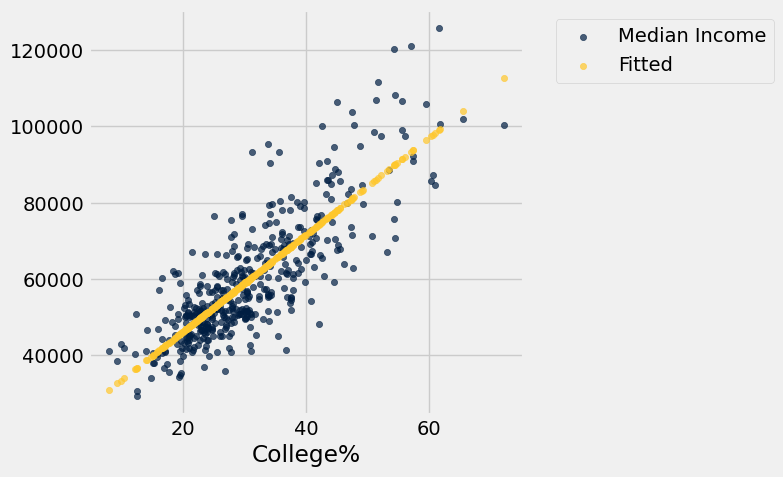

In [9]:
fitted_income = demographics.select('College%', 'Median Income')
fitted_income = fitted_income.with_columns('Fitted',
    fitted_values(demographics, 'College%', 'Median Income'))
fitted_income.scatter('College%')
plots.show()

In [10]:
income_residuals = fitted_income.with_columns(
    'Residual', residuals(demographics, 'College%', 'Median Income')
)
income_residuals.show(5)

College%,Median Income,Fitted,Residual
24,47083,51299.4,-4216.42
21.8,42035,48503.9,-6468.87
22.8,46544,49774.6,-3230.58
17,41110,42404.5,-1294.51
30.3,51690,59304.8,-7614.84


These two functions will help us plot things the rest of the way.

In [12]:
def plot_fitted(t, x, y):
    tbl = t.with_columns('Fitted', fitted_values(t, x, y))
    tbl.select(x, y, 'Fitted').scatter(0)
    plots.show()

In [11]:
def plot_residuals(t, x, y):
    tbl = t.with_columns('Residual', residuals(t, x, y))
    tbl.scatter(x, 'Residual')
    plots.show()

______

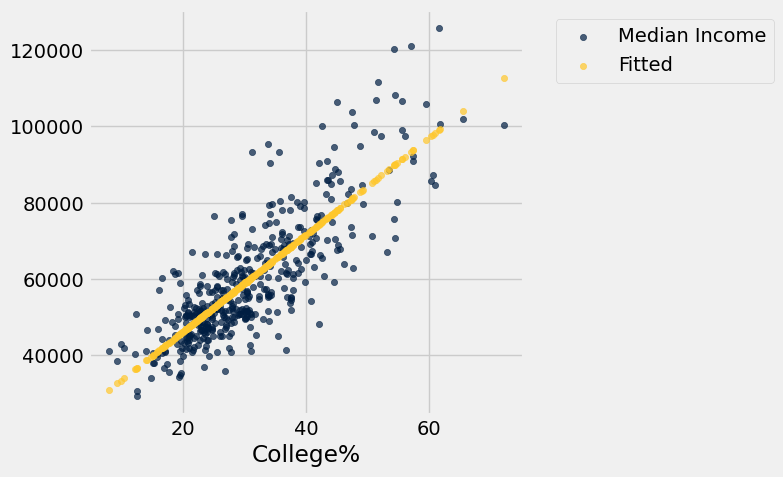

In [13]:
plot_fitted(demographics, 'College%', 'Median Income')

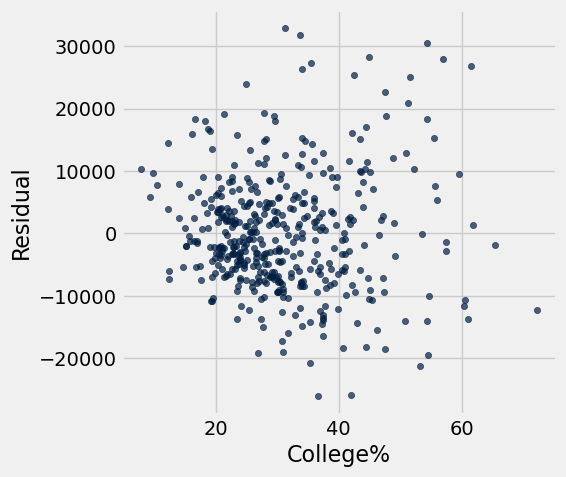

In [14]:
plot_residuals(demographics, 'College%', 'Median Income')

#### Case study 2: dugongs 

In [15]:
dugong = Table.read_table('dugong.csv')
dugong.show(5)

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5


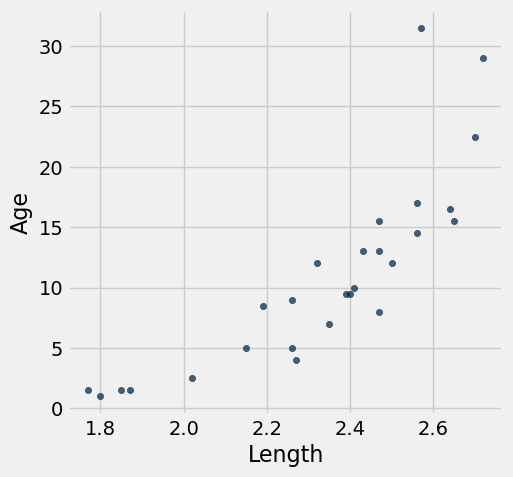

In [16]:
dugong.scatter('Length', 'Age')
plots.show()

In [17]:
correlation(dugong, 'Length', 'Age')

0.82964745549057139

$\text{estimate of Age} = a \cdot \text{Length} + b$

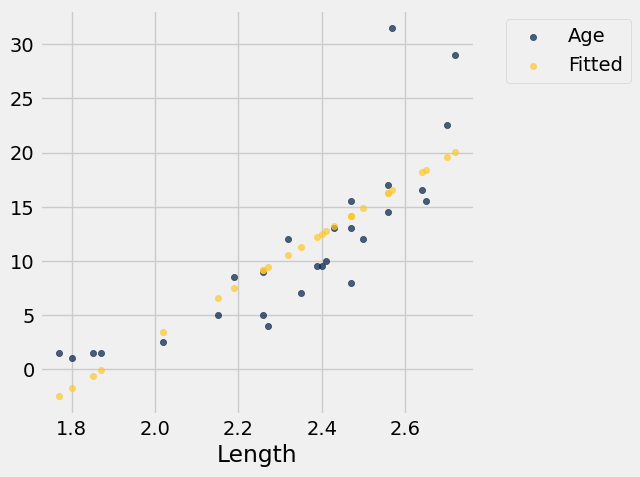

In [18]:
plot_fitted(dugong, 'Length', 'Age')

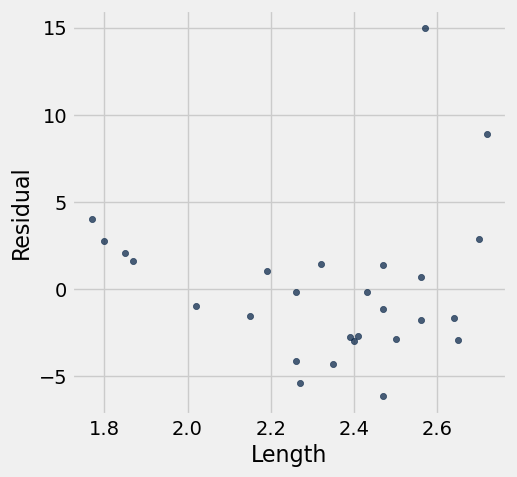

In [19]:
plot_residuals(dugong, 'Length', 'Age')

#### Case study 3: US women

In [20]:
us_women = Table.read_table('us_women.csv')
us_women.show(5)

height,ave weight
58,115
59,117
60,120
61,123
62,126


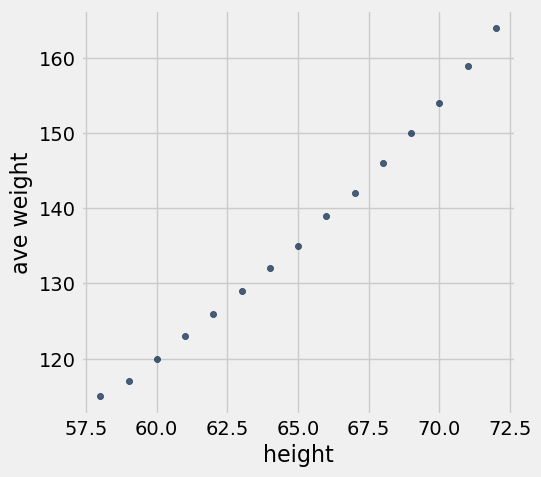

In [21]:
us_women.scatter('height')
plots.show()

In [22]:
correlation(us_women, 'height', 'ave weight')

0.99549476778421608

$\text{estimate of height} = a \cdot \text{average weight} + b$

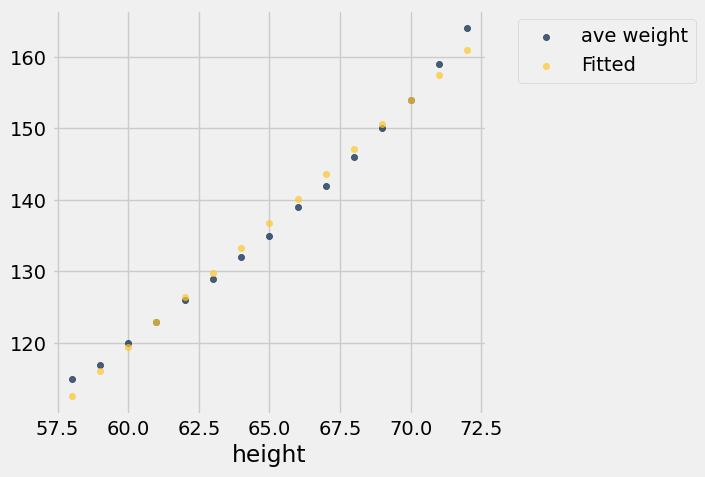

In [23]:
plot_fitted(us_women, 'height', 'ave weight')

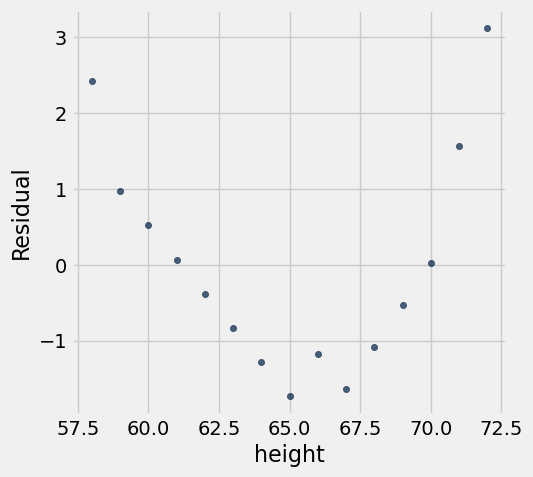

In [24]:
plot_residuals(us_women, 'height', 'ave weight')

#### Case study 4: Heights

In [25]:
family_heights = Table.read_table('family_heights.csv')
family_heights.where('family', '1')

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female


In [26]:
parents = (family_heights.column('father') + family_heights.column('mother'))/2
heights = Table().with_columns(
    'Parent Average', parents,
    'Child', family_heights.column('child')
    )
heights.show(6)

Parent Average,Child
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5
71,72.5


$\text{estimate of a child's adult height} = a \cdot \text{average parent height} + b$

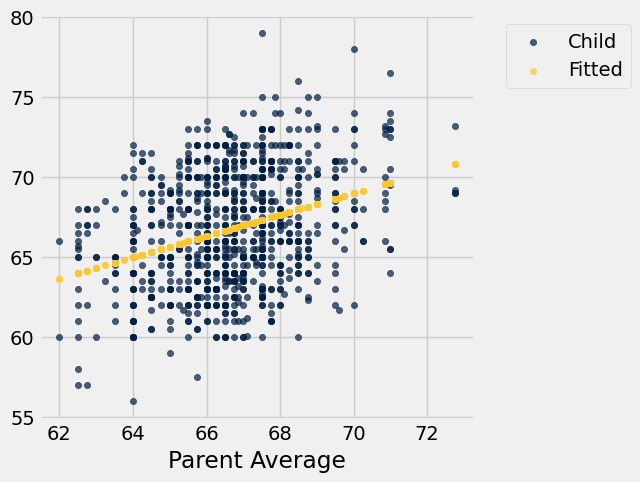

In [27]:
plot_fitted(heights, 'Parent Average', 'Child')

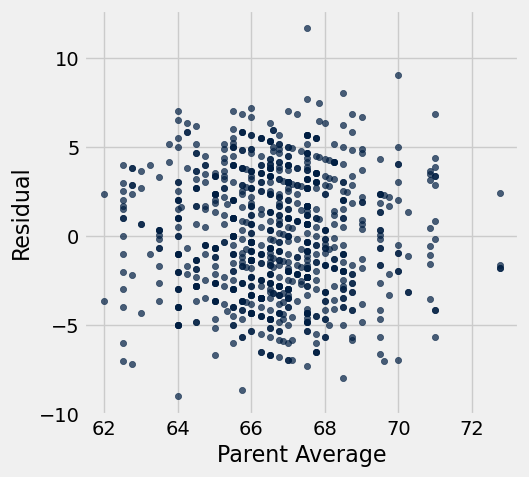

In [28]:
plot_residuals(heights, 'Parent Average', 'Child')

### Residuals have some special properties!

 The average of the residuals are zero.

In [29]:
round(np.average(residuals(demographics, 'College%', 'Median Income')), 10)

0.0

In [30]:
round(np.average(residuals(dugong, 'Length', 'Age')), 10)

0.0

In [31]:
round(np.average(residuals(heights, 'Parent Average', 'Child')), 10)

0.0

______

The correlation coefficients between:

- The residuals and $x$
- The residuals and the fitted values

are both 0.

In [32]:
heights = heights.with_columns(
    'Residual', residuals(heights, 'Parent Average', 'Child'),
    'Fitted Value', fitted_values(heights, 'Parent Average', 'Child')
)

In [33]:
round(correlation(heights, 'Parent Average', 'Residual'), 10)

0.0

In [34]:
round(correlation(heights, 'Fitted Value', 'Residual'), 10)

0.0